# Gabriel Magalhaes shot map from set-pieces in Premier League
Gabriel Magalhaes has been a bedrock of Arsenal's defense since joining from Lille back in 2020. The Brazilian is more than just a defensive juggernaut, as he constanly threatened whenever Arsenal won a free kick or corner kick. Here, we will visualize his impact in scoring goals from set-piece situations.

In [1]:
# Load the required libraries
import pandas as pd
import numpy as np

# These libraries will help in visualizing his shots
import mplsoccer
from mplsoccer import PyPizza, FontManager, add_image, VerticalPitch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import matplotlib.font_manager as font_manager
import imageio.v2 as imageio
import os
from PIL import Image
from urllib.request import urlopen

## Load the Data
For this analysis, we will use shooting data from Understat.

In [2]:
# Load the CSV file save it as 'df_gabriel' dataframe
df_gabriel = pd.read_csv('/Users/jasonrobert/Desktop/ars_clutch_goals/data/gabriel_ars_corner.csv')
df_gabriel.head(10)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,376486,48,Goal,0.949,0.482,0.506097,Gabriel,a,5613,FromCorner,2020,OtherBodyPart,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,Willian,Cross
1,382108,45,BlockedShot,0.907,0.371,0.015430,Gabriel,a,5613,FromCorner,2020,Head,14480,Manchester City,Arsenal,1,0,2020-10-17 16:30:00,Willian,End
2,382109,46,MissedShots,0.886,0.431,0.079247,Gabriel,a,5613,FromCorner,2020,LeftFoot,14480,Manchester City,Arsenal,1,0,2020-10-17 16:30:00,NaN,NaN
3,384079,12,BlockedShot,0.876,0.476,0.082234,Gabriel,h,5613,FromCorner,2020,LeftFoot,14485,Arsenal,Leicester,0,1,2020-10-25 19:15:00,Bukayo Saka,HeadPass
4,384078,12,MissedShots,0.907,0.503,0.083503,Gabriel,h,5613,FromCorner,2020,LeftFoot,14485,Arsenal,Leicester,0,1,2020-10-25 19:15:00,Dani Ceballos,Cross
5,388077,16,MissedShots,0.936,0.466,0.060162,Gabriel,a,5613,FromCorner,2020,Head,14518,Leeds,Arsenal,0,0,2020-11-22 16:30:00,Nicolas Pepe,Aerial
6,389671,29,Goal,0.918,0.570,0.066819,Gabriel,h,5613,FromCorner,2020,Head,14525,Arsenal,Wolverhampton Wanderers,1,2,2020-11-29 19:15:00,Willian,Cross
7,392408,29,MissedShots,0.927,0.528,0.331733,Gabriel,h,5613,FromCorner,2020,Head,14554,Arsenal,Burnley,0,1,2020-12-13 19:15:00,Willian,Cross
8,403002,79,SavedShot,0.879,0.450,0.080980,Gabriel,a,5613,FromCorner,2020,LeftFoot,14655,Aston Villa,Arsenal,1,0,2021-02-06 12:30:00,Granit Xhaka,HeadPass
9,415657,90,BlockedShot,0.938,0.376,0.012752,Gabriel,h,5613,FromCorner,2020,Head,14745,Arsenal,Fulham,1,1,2021-04-18 12:30:00,Dani Ceballos,Aerial


## Data Processing
Before we plot the location of Gabriel's shots, we need to change the coordinates to a 0-100 scale to fit the OPTA type pitch in mplSoccer.
We also need to do some calculations that will go as annotations in the shot map.

In [3]:
# Change the dimensions of X and Y coordinates
df_gabriel['X'] = df_gabriel['X'] * 100
df_gabriel['Y'] = df_gabriel['Y'] * 100

In [4]:
# We need to do some calculations that will be used for annotations in the charts
total_shots = df_gabriel.shape[0]
total_goals = df_gabriel[df_gabriel['result'] == 'Goal'].shape[0]
total_xg = df_gabriel['xG'].sum()
xg_per_shot = total_xg/total_shots
points_average_distance = df_gabriel['X'].mean()
actual_average_distance = 120 - (df_gabriel['X'] * 1.2).mean()

In [5]:
# Check the actual average distance of Gabriel's shots
actual_average_distance

np.float64(7.68827588311558)

In [6]:
# Filter where the result of the shot is a goal - the goals will be plotted into the shot map
gabi_goals = df_gabriel[df_gabriel['result'] == 'Goal']
gabi_goals

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,376486,48,Goal,94.900002,48.200001,0.506097,Gabriel,a,5613,FromCorner,2020,OtherBodyPart,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,Willian,Cross
6,389671,29,Goal,91.800003,57.000000,0.066819,Gabriel,h,5613,FromCorner,2020,Head,14525,Arsenal,Wolverhampton Wanderers,1,2,2020-11-29 19:15:00,Willian,Cross
15,439381,4,Goal,95.599998,43.900002,0.120174,Gabriel,a,5613,FromCorner,2021,Head,16468,Leicester,Arsenal,0,2,2021-10-30 11:30:00,Bukayo Saka,Cross
18,447740,61,Goal,96.900002,50.000000,0.562536,Gabriel,h,5613,FromCorner,2021,Head,16526,Arsenal,Southampton,3,0,2021-12-11 15:00:00,Gabriel Martinelli,Cross
22,456693,24,Goal,97.599998,48.799999,0.897239,Gabriel,a,5613,FromCorner,2021,RightFoot,16611,Wolverhampton Wanderers,Arsenal,0,1,2022-02-10 19:45:00,Alexandre Lacazette,Rebound
27,472302,53,Goal,96.199997,42.099998,0.297934,Gabriel,a,5613,FromCorner,2021,Head,16717,West Ham,Arsenal,1,2,2022-05-01 15:30:00,Gabriel Martinelli,Cross
29,477868,58,Goal,91.800003,57.599998,0.420624,Gabriel,h,5613,FromCorner,2021,LeftFoot,16746,Arsenal,Everton,5,1,2022-05-22 15:00:00,Cédric Soares,Pass
31,483838,85,Goal,98.300003,53.200001,0.841051,Gabriel,h,5613,FromCorner,2022,LeftFoot,18238,Arsenal,Fulham,2,1,2022-08-27 16:30:00,William Saliba,NaN
36,498423,62,Goal,99.300003,52.200001,0.811229,Gabriel,a,5613,FromCorner,2022,LeftFoot,18343,Chelsea,Arsenal,0,1,2022-11-06 12:00:00,Bukayo Saka,Cross
41,514096,20,Goal,96.500000,50.599998,0.138755,Gabriel,a,5613,FromCorner,2022,Head,18465,Fulham,Arsenal,0,3,2023-03-12 14:00:00,Leandro Trossard,Cross


## Data Visualization
Here, we will plot Gabriel's shot map from corner kick situations.

Text(0.01, 0.15, 'Data: understat.com\nGraphic by jsonrbrbt.bsky.social')

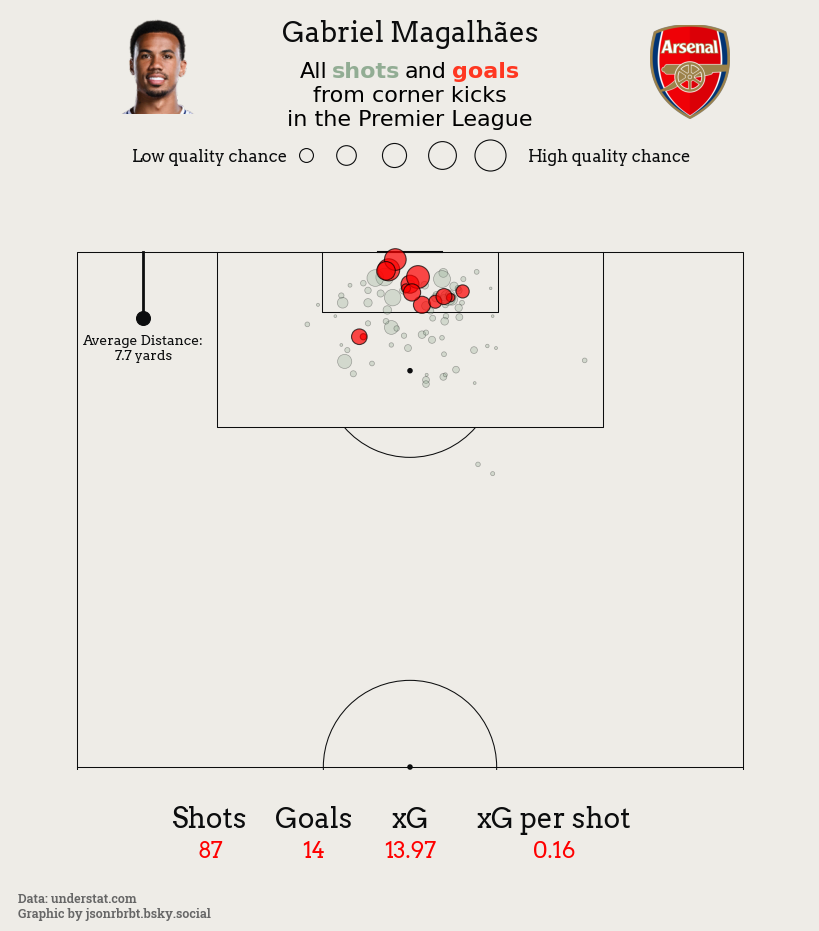

In [8]:
# --------------------------
# Big Gabi Shot Map (Overall)
# --------------------------

# Load the font and set the background color
font_path = '/Users/jasonrobert/Downloads/Arvo/Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)
background_color = '#EEECE7'

# 1. Load Images
img = mpimg.imread('desktop/ars_clutch_goals/images/big_gabi.png')
ars = mpimg.imread('desktop/ars_clutch_goals/images/arsenal_logo.png')

# 2. Set Up Figure
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

# 3. Header Section: Title, Player Image, Legend
ax1 = fig.add_axes([0, 0.7, 1, 0.2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

# Add Gabriel's portrait and Arsenal Logo
add_image(img, fig, left=0.12, bottom=0.8, width=0.13, height=0.127)
add_image(ars, fig, left=0.8, bottom=0.805, width=0.1, height=0.1)

# Title Text
ax1.text(0.5, 0.90, 'Gabriel Magalhães', fontproperties=font_props, fontsize=20, fontweight='bold', color='#0C0D0E', ha='center')

# Subtitle Line with Mixed Colors
ax1.text(0.38, 0.75, 'All', fontsize=16, fontweight='light', ha='center', color='black')
ax1.text(0.445, 0.75, 'shots', fontsize=16, fontweight='bold', ha='center', color='#92AD94')
ax1.text(0.52, 0.75, 'and', fontsize=16, fontweight='light', ha='center', color='black')
ax1.text(0.595, 0.75, 'goals', fontsize=16, fontweight='bold', ha='center', color='#FF3721')
ax1.text(0.5, 0.65, 'from corner kicks', fontsize=16, fontweight='light', ha='center', color='black')
ax1.text(0.5, 0.55, 'in the Premier League', fontsize=16, fontweight='light', ha='center', color='black')

# xG Shot Size Legend
ax1.text(0.25, 0.4, 'Low quality chance', fontproperties=font_props, fontsize=12, fontweight='bold', color='#0C0D0E', ha='center')
sizes = [100, 200, 300, 400, 500]
x_positions = [0.37, 0.42, 0.48, 0.54, 0.6]
for x_pos, size in zip(x_positions, sizes):
    ax1.scatter(x=x_pos, y=0.43, s=size, color=background_color, edgecolor='#0C0D0E', linewidth=0.8)
ax1.text(0.75, 0.4, 'High quality chance', fontproperties=font_props, fontsize=12, fontweight='bold', color='#0C0D0E', ha='center')

# 4. Middle Section: Pitch + Shots
ax2 = fig.add_axes([0.05, 0.25, 0.9, 0.5])
ax2.set_facecolor(background_color)

pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=0.5,
    line_color='#0C0D0E',
    linewidth=0.75,
    axis=True,
    label=True
)
pitch.draw(ax=ax2)

# Average Distance Line and Label
ax2.scatter(x=90, y=points_average_distance, s=100, color='#0C0D0E', linewidth=0.8)
ax2.plot([90, 90], [100, points_average_distance], color='#0C0D0E', linewidth=2)
ax2.text(
    x=90, y=points_average_distance - 4,
    s=f'Average Distance:\n{actual_average_distance:.1f} yards',
    fontsize=10, fontproperties=font_props, color='#0C0D0E', ha='center'
)

# Plot Non-goal Shots
non_goals_df = df_gabriel[df_gabriel['result'] != 'Goal']
pitch.scatter(
    non_goals_df['X'],
    non_goals_df['Y'],
    s=300 * non_goals_df['xG'],
    color='#92AD94',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.3,
    ax=ax2,
    zorder=1
)

# Plot Goals (Vectorized)
gabi_goals_df = df_gabriel[df_gabriel['result'] == 'Goal']
pitch.scatter(
    gabi_goals_df['X'],
    gabi_goals_df['Y'],
    s=300 * gabi_goals_df['xG'],
    color='red',
    edgecolor='black',
    linewidth=0.8,
    alpha=0.7,
    ax=ax2,
    zorder=2
)

# 5. Footer Section: Summary Stats
ax3 = fig.add_axes([0, 0.2, 1, 0.05])
ax3.set_facecolor(background_color)

footer_labels = ['Shots', 'Goals', 'xG', 'xG per shot']
footer_values = [total_shots, total_goals, f'{total_xg:.2f}', f'{xg_per_shot:.2f}']
footer_positions = [0.25, 0.38, 0.50, 0.68]

for x, label, value in zip(footer_positions, footer_labels, footer_values):
    ax3.text(x=x, y=0.5, s=label, fontsize=20, fontproperties=font_props, fontweight='bold', color='#0C0D0E', ha='center')
    ax3.text(x=x, y=0, s=str(value), fontsize=16, fontproperties=font_props, color='red', ha='center')

# 6. Turn Off Axes
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

# 7. Credits
fig.text(
    0.01, 0.15,
    "Data: understat.com\nGraphic by jsonrbrbt.bsky.social",
    size=9, fontfamily="Roboto Slab", color="#666666", ha="left"
)

In [9]:
# Save the shot map to a PNG file
fig.savefig('visuals/gabriel_shotmap_from_corner.png', dpi=300, bbox_inches='tight')

## Summary and Takeaways
Arsenal's growth in recent seasons from consecutive eigth place finishes to Premier League title contenders could not be separated from Gabriel's contributions. His partnership with Ben White and then William Saliba underpin Arsenal's defensive solidity. He has also become a tremendous asset for Arsenal in set-piece situations with Nicolas Jover devising schemes that allows the Brazilian to take advantage of his strength and frame.